Tugas Analasisi Big Data

Nama : Clarissa Sanindita Reikisyifa

NIM : 202010370311232

<h2>Load Dataset and Library</h2>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
df_ass = pd.read_csv('D:/_KULIAH/SEMESTER 7/Analisis Big Data/Dataset/assessments.csv')
df_cours = pd.read_csv('D:/_KULIAH/SEMESTER 7/Analisis Big Data/Dataset/courses.csv')
df_studass = pd.read_csv('D:/_KULIAH/SEMESTER 7/Analisis Big Data/Dataset/studentAssessment.csv')
df_studin = pd.read_csv('D:/_KULIAH/SEMESTER 7/Analisis Big Data/Dataset/studentInfo.csv')
df_studreg = pd.read_csv('D:/_KULIAH/SEMESTER 7/Analisis Big Data/Dataset/studentRegistration.csv')
df_studvle = pd.read_csv('D:/_KULIAH/SEMESTER 7/Analisis Big Data/Dataset/studentVle.csv')
df_vle = pd.read_csv('D:/_KULIAH/SEMESTER 7/Analisis Big Data/Dataset/vle.csv')

<h2>Assesments</h2>

**EDA**

In [3]:
df_ass.shape

(206, 6)

(206, 6) memberi informasi bahwa dataset terdiri dari 206 baris data dan 6 kolom variabel.

In [4]:
df_ass.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [5]:
df_ass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


Penjelasan feature

1   code_presentation : kode identifikasi modul tempat penilaian berada.

2   id_assessment : nomor identifikasi penilaian.

3   assessment_type : tipe penilaian. Ada tiga jenis penilaian: Tutor Marked Assessment (TMA), Computer Marked Assessment (CMA) dan Ujian Akhir (Exam)

4   date : informasi tanggal penyerahan akhir penilaian yang dihitung sebagai jumlah hari sejak dimulainya presentasi modul. Tanggal mulai presentasi diberi angka 0 (nol).

5   weight : bobot penilaian dalam%. Biasanya, Ujian diperlakukan secara terpisah dan memiliki bobot 100%; jumlah seluruh penilaian lainnya adalah 100%.

6. code_module : kode untuk suatu modul dalam program pendidikan atau kursus

**Cleaning Data**

In [6]:
nilai_null = df_ass.isnull().sum()
print("Nilai Null:")
print(nilai_null)

nilai_duplikat = df_ass.duplicated().sum()
print("\nNilai Duplikat:", nilai_duplikat)

Nilai Null:
code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64

Nilai Duplikat: 0


Terdapat 11 data bernilai null dan 0 data yang duplikat

In [7]:
df_ass=df_ass.ffill() #mengisi nilai yang hilang
df_ass=df_ass.drop_duplicates() #menghapus nilai yang duplikat

In [8]:
df_ass.isna().sum()

code_module          0
code_presentation    0
id_assessment        0
assessment_type      0
date                 0
weight               0
dtype: int64

**Visualisasi**

In [9]:
df_ass["code_module"].unique()

array(['AAA', 'BBB', 'CCC', 'DDD', 'EEE', 'FFF', 'GGG'], dtype=object)

<h2>Course</h2>

**EDA**

In [10]:
df_cours.shape

(22, 3)

(22, 3) memberi informasi bahwa dataset terdiri dari 22 baris data dan 3 kolom variabel.

In [11]:
df_cours.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [12]:
df_cours.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 660.0+ bytes


Penjelasan feature

1   code_module : nama kode modul, yang berfungsi sebagai pengenal.

2   code_presentation : nama kode presentasi. Terdiri dari tahun dan “B” untuk presentasi yang dimulai pada bulan Februari dan “J” untuk presentasi yang dimulai pada bulan Oktober.

3   length : panjang presentasi modul dalam hari.

Menampilkan nilai tertinggi hingga nilai terendah, nilai rata-rata, dan standar deviasi tiap feature

**Cleaning Data**

In [13]:
nilai_null = df_cours.isnull().sum()
print("Nilai Null:")
print(nilai_null)

nilai_duplikat = df_cours.duplicated().sum()
print("\nNilai Duplikat:", nilai_duplikat)

Nilai Null:
code_module                   0
code_presentation             0
module_presentation_length    0
dtype: int64

Nilai Duplikat: 0


Tidak ada nilai null dan nilai duplikat

<h2>Student Assesments</h2>

**EDA**

In [14]:
df_studass.shape

(173912, 5)

(173912, 5) memberi informasi bahwa dataset terdiri dari 173912 baris data dan 5 kolom variabel.


In [15]:
df_studass.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [16]:
df_studass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB


Penjelasan feature

1   id_assessment : nomor identifikasi penilaian.

2   id_student : nomor identifikasi unik untuk siswa.

3   date_submitted : tanggal penyerahan siswa, diukur sebagai jumlah hari sejak dimulainya presentasi modul.

4   is_banked : tanda status yang menunjukkan bahwa hasil penilaian telah ditransfer dari presentasi sebelumnya.

5   score : skor siswa dalam penilaian ini. Kisarannya adalah dari 0 hingga 100. Skor yang lebih rendah dari 40 diartikan sebagai Gagal. Nilainya berkisar antara 0 hingga 100.

**Cleaning Data**

In [17]:
nilai_null = df_studass.isnull().sum()
print("Nilai Null:")
print(nilai_null)

nilai_duplikat = df_studass.duplicated().sum()
print("\nNilai Duplikat:", nilai_duplikat)

Nilai Null:
id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64

Nilai Duplikat: 0


Terdapat 173 data bernilai null dan 0 data yang duplikat

In [18]:
df_studass=df_studass.ffill()
df_studass=df_studass.drop_duplicates()

In [19]:
df_studass.isna().sum()

id_assessment     0
id_student        0
date_submitted    0
is_banked         0
score             0
dtype: int64

<h2>Student Info</h2>

In [20]:
df_studin.shape

(32593, 12)

(32593, 12) memberi informasi bahwa dataset terdiri dari 173912 baris data dan 12 kolom variabel.

In [21]:
df_studin.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [22]:
df_studin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


Penjelasan feature

1   code_module : kode identifikasi untuk modul tempat siswa terdaftar.

2   code_presentation : kode identifikasi presentasi saat siswa terdaftar pada modul.

3   id_student : nomor identifikasi unik untuk siswa.

4   gender : jenis kelamin siswa.

5   region : mengidentifikasi wilayah geografis, tempat tinggal siswa saat mengambil presentasi modul.

6   highest_education : tingkat pendidikan siswa tertinggi saat masuk ke presentasi modul.

7   imd_band : menentukan pita Indeks Kerusakan Berganda di tempat siswa tinggal selama presentasi modul.

8   age_band : kelompok usia siswa.

9   num_of_prev_attempts : berapa kali siswa mencoba modul ini.

10   studied_credits : jumlah total SKS untuk modul yang sedang dipelajari siswa.

11  disability : menunjukkan apakah siswa telah dinyatakan cacat.

12  final_result : hasil akhir siswa dalam presentasi modul.

**Data Cleaning**

In [23]:
nilai_null = df_studin.isnull().sum()
print("Nilai Null:")
print(nilai_null)

nilai_duplikat = df_studin.duplicated().sum()
print("\nNilai Duplikat:", nilai_duplikat)

Nilai Null:
code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

Nilai Duplikat: 0


Terdapat 1111 data bernilai null dan 0 data yang duplikat

In [24]:
df_studin = df_studin.ffill()
df_studin = df_studin.drop_duplicates()

In [25]:
df_studin.isna().sum()

code_module             0
code_presentation       0
id_student              0
gender                  0
region                  0
highest_education       0
imd_band                0
age_band                0
num_of_prev_attempts    0
studied_credits         0
disability              0
final_result            0
dtype: int64

<h2>Student Registrasi</h2>

In [26]:
df_studreg.shape

(32593, 5)

(32593, 5) memberi informasi bahwa dataset terdiri dari 173912 baris data dan 5 kolom variabel.

In [27]:
df_studreg.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [28]:
df_studreg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


Penjelasan feature

1   code_module : kode identifikasi untuk modul tempat siswa terdaftar.

2   code_presentation : kode identifikasi presentasi saat siswa terdaftar pada modul.

3   id_student : nomor identifikasi unik untuk siswa.

4   date_registration : tanggal pendaftaran siswa pada presentasi modul, ini adalah jumlah hari yang diukur relatif terhadap dimulainya presentasi modul

5   date_unregistration : tanggal pembatalan registrasi siswa dari presentasi modul, ini adalah jumlah hari yang diukur relatif terhadap awal presentasi modul.


**Data Cleaning**

In [29]:
nilai_null = df_studreg.isnull().sum()
print("Nilai Null:")
print(nilai_null)

nilai_duplikat = df_studreg.duplicated().sum()
print("\nNilai Duplikat:", nilai_duplikat)

Nilai Null:
code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64

Nilai Duplikat: 0


Terdapat 45 data bernilai null dari kolom date_unregistration dan 22521 dari kolom date_registration

In [30]:
df_studreg = df_studreg.ffill()
df_studreg = df_studreg.drop_duplicates()

In [31]:
df_studreg.isna().sum()

code_module            0
code_presentation      0
id_student             0
date_registration      0
date_unregistration    2
dtype: int64

Setekah di cleaning ternyata ada 2 data yang tidak terganti

<h2>Student Vle</h2>

**EDA**

In [32]:
df_studvle.shape

(10655280, 6)

(10655280, 6) memberi informasi bahwa dataset terdiri dari 0655280 baris data dan 6 kolom variabel.


In [33]:
df_studvle.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


In [34]:
df_studvle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         int64 
 3   id_site            int64 
 4   date               int64 
 5   sum_click          int64 
dtypes: int64(4), object(2)
memory usage: 487.8+ MB


**Cleaning Data**

In [35]:
nilai_null = df_studvle.isnull().sum()
print("Nilai Null:")
print(nilai_null)

nilai_duplikat = df_studvle.duplicated().sum()
print("\nNilai Duplikat:", nilai_duplikat)

Nilai Null:
code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
dtype: int64

Nilai Duplikat: 787170


Terdapat  data 0 bernilai null dan 787170 data yang duplikat

In [36]:
df_studvle=df_studvle.ffill()
df_studvle=df_studvle.drop_duplicates()

In [37]:
df_studass.isna().sum()

id_assessment     0
id_student        0
date_submitted    0
is_banked         0
score             0
dtype: int64

<h2>Visualisasi Data</h2>

**Distribusi Gender Siswa**

Pada pie chart ditunjukkan jumlah laki-laki lebih banyak dari perempuan

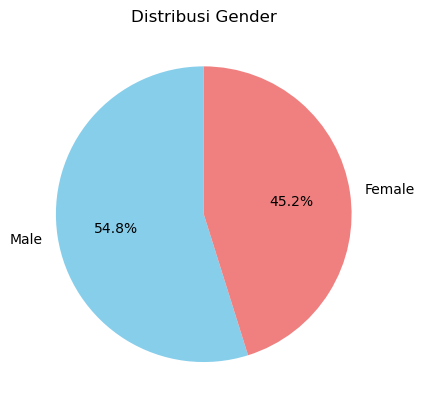

In [38]:
gender_counts = df_studin['gender'].value_counts()
labels = ['Male' if gender == 'M' else 'Female' for gender in gender_counts.index]

gender_counts.plot(kind='pie', colors=['skyblue', 'lightcoral'], autopct='%1.1f%%', startangle=90, labels=labels)
plt.title('Distribusi Gender')
plt.ylabel('')
plt.show()


**Pendidikan Tertinggi Apa yang Paling Umum di Setiap Rentang Usia?**

Berdasarkan distribusi pendidikan berdasarkan usia ditemukan bahwa pendidikan tertinggi ditiap rentang usia adalah :
1. Rentang Usia 0-35 tahun
Pendidikan "Lower Than A Level" memiliki posisi tertinggi pada kelompok usia ini. Hal ini mungkin karena pada kelompok usia tersebut siswa baru menyelesaikan pendidikan menengah atau dalam proses pendidikan tinggi.
2. Rentang Usia 35-55 tahun
Individu dalam kelompok usia ini memiliki latar belakang pendidikan yang hampir sama antara "A Level or Equivalent" dan "Lower Than A Level"
3. Rentang Usia 55 tahun ke atas
Pada kelompok usia ini kebanyakan individu telah lulus dari sarjana dengan memiliki level pendidikan "HE Qualification"

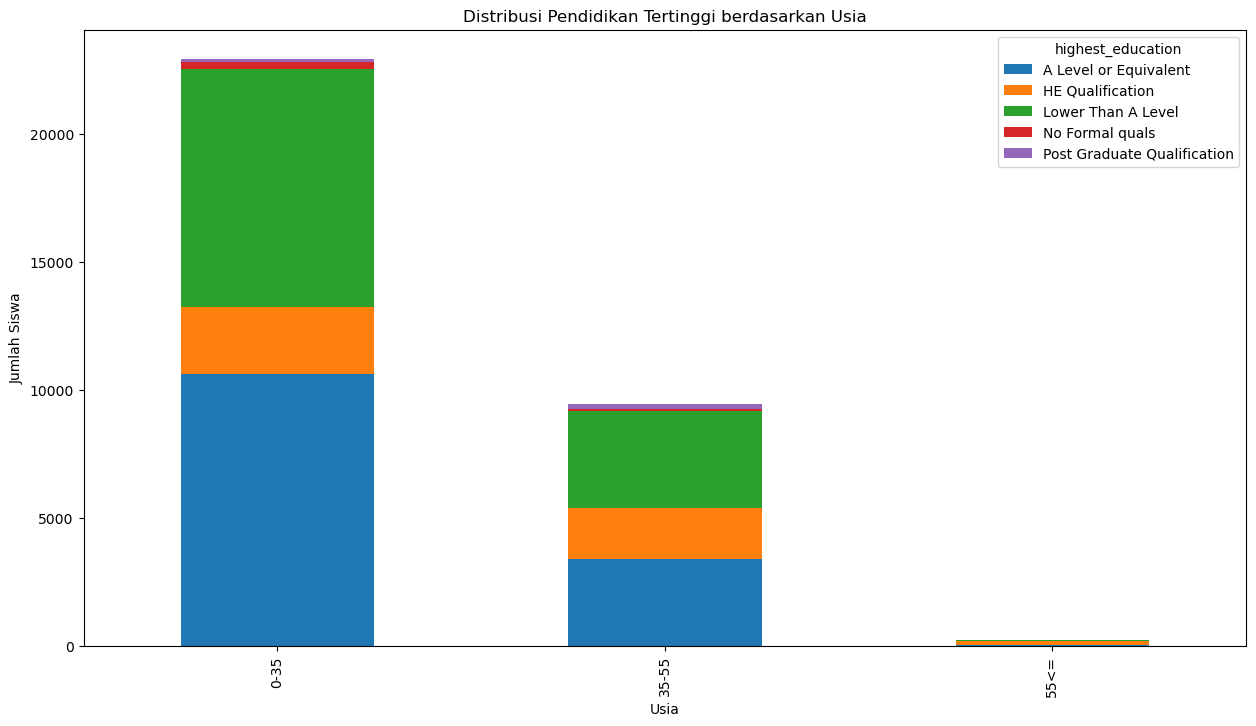

In [39]:
pivot_df = df_studin.groupby(['age_band', 'highest_education']).size().unstack().fillna(0)
pivot_df.plot(kind='bar', stacked=True, figsize=(15,8))
plt.title('Distribusi Pendidikan Tertinggi berdasarkan Usia')
plt.xlabel('Usia')
plt.ylabel('Jumlah Siswa')
plt.show()

In [40]:
pivot_df = df_studin.groupby(['age_band', 'highest_education']).size().unstack().fillna(0)
pivot_df

highest_education,A Level or Equivalent,HE Qualification,Lower Than A Level,No Formal quals,Post Graduate Qualification
age_band,,,,,
0-35,10624.0,2612.0,9311.0,294.0,103.0
35-55,3381.0,1986.0,3814.0,53.0,199.0
55<=,40.0,132.0,33.0,0.0,11.0


**Tren Berdasarkan Modul, Semester, dan Jenis Ujian**

Code Module : Beberapa modul seperti "FFF" dan "GGG" tampaknya lebih menarik bagi siswa

Code Presentation : Siswa tampaknya memiliki preferensi tertentu untuk waktu pendaftaran, dengan "2013J" dan "2014B" sebagai periode paling populer.

Assessment Type : TMA tampaknya merupakan metode penilaian yang dominan. Ini bisa disebabkan oleh fleksibilitasnya, feedback yang lebih personal.

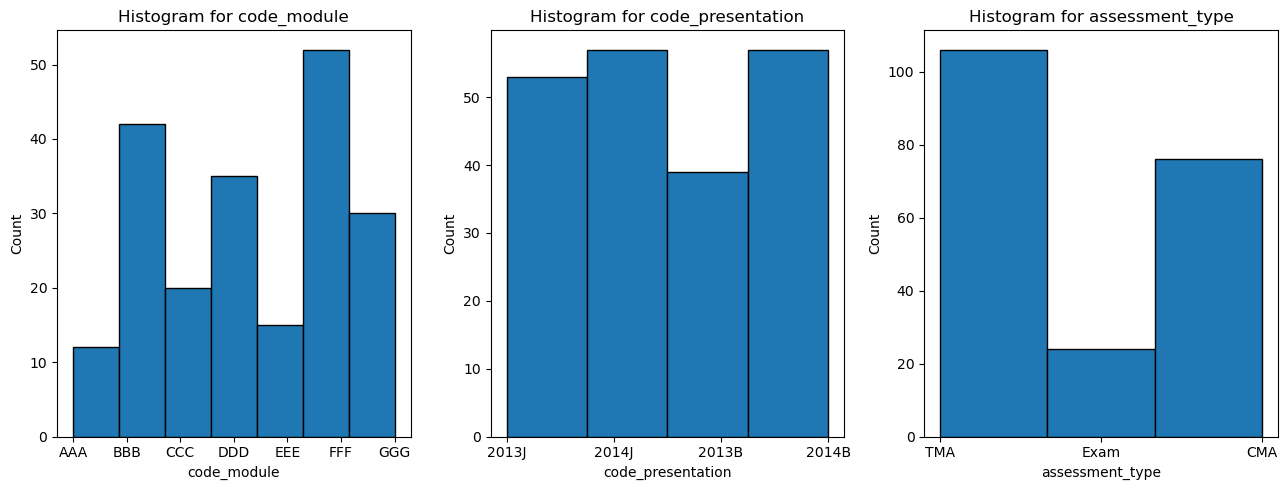

In [41]:
fig, ax = plt.subplots(1, 3, figsize=(13, 5))

ax[0].hist(df_ass['code_module'], bins=len(df_ass['code_module'].unique()), edgecolor='black')
ax[0].set_xlabel('code_module')
ax[0].set_ylabel('Count')
ax[0].set_title('Histogram for code_module')

ax[1].hist(df_ass['code_presentation'], bins=len(df_ass['code_presentation'].unique()), edgecolor='black')
ax[1].set_xlabel('code_presentation')
ax[1].set_ylabel('Count')
ax[1].set_title('Histogram for code_presentation')

ax[2].hist(df_ass['assessment_type'], bins=len(df_ass['assessment_type'].unique()), edgecolor='black')
ax[2].set_xlabel('assessment_type')
ax[2].set_ylabel('Count')
ax[2].set_title('Histogram for assessment_type')

plt.tight_layout()
plt.show()


**Distribusi Nilai Siswa**

Distribusi nilai dari sekelompok siswa dan membandingkan kinerja antar siswa dalam kelompok ini. Hal ini bisa menjadi alat yang berguna untuk mengidentifikasi siswa mana yang mungkin memerlukan bantuan lebih lanjut atau untuk memahami variasi dalam skor dalam sampel awal dataset tersebut.

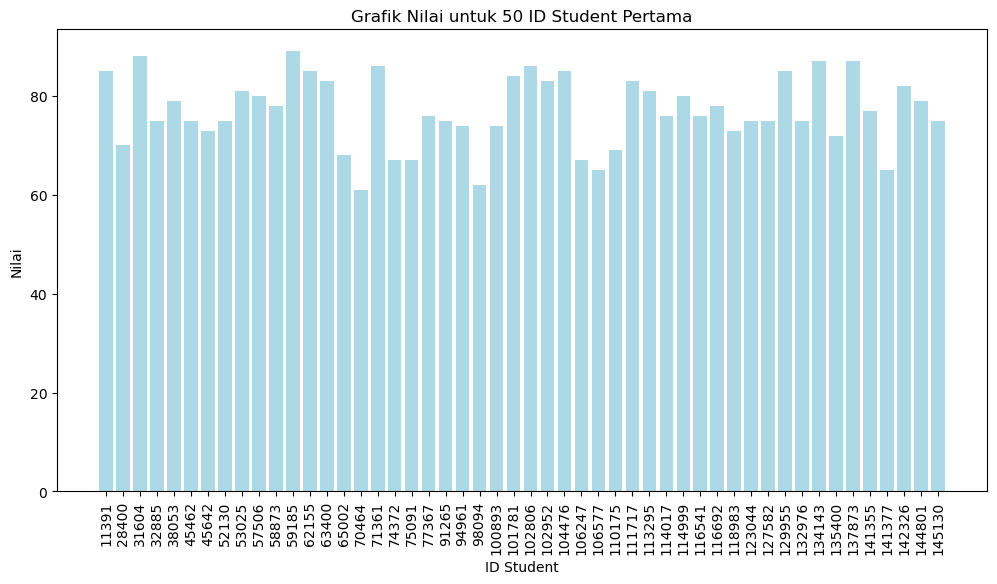

In [42]:
top_50_students = df_studass['id_student'].unique()[:50]
sorted_data = df_studass.sort_values(by='id_student')
filtered_data = sorted_data[sorted_data['id_student'].isin(top_50_students)]

plt.figure(figsize=(12, 6))
plt.bar(filtered_data['id_student'].astype(str), filtered_data['score'], color='lightblue')
plt.xlabel('ID Student')
plt.ylabel('Nilai')
plt.title('Grafik Nilai untuk 50 ID Student Pertama')
plt.xticks(rotation=90)
plt.show()

**Distribusi Hasil Akhir Siswa** 

Sebagian besar siswa berhasil menyelesaikan kursus dengan hasil yang memuaskan, namun ada juga sejumlah signifikan yang memilih untuk menarik diri sebelum menyelesaikannya. Meskipun banyak siswa yang berhasil, hanya sebagian kecil yang mencapai standar tertinggi, yaitu "Distinction". Upaya mungkin perlu dilakukan untuk memahami alasan mengapa begitu banyak siswa memilih untuk menarik diri dan bagaimana institusi atau program dapat mendukung mereka lebih baik untuk mencegah hal ini terjadi di masa depan.

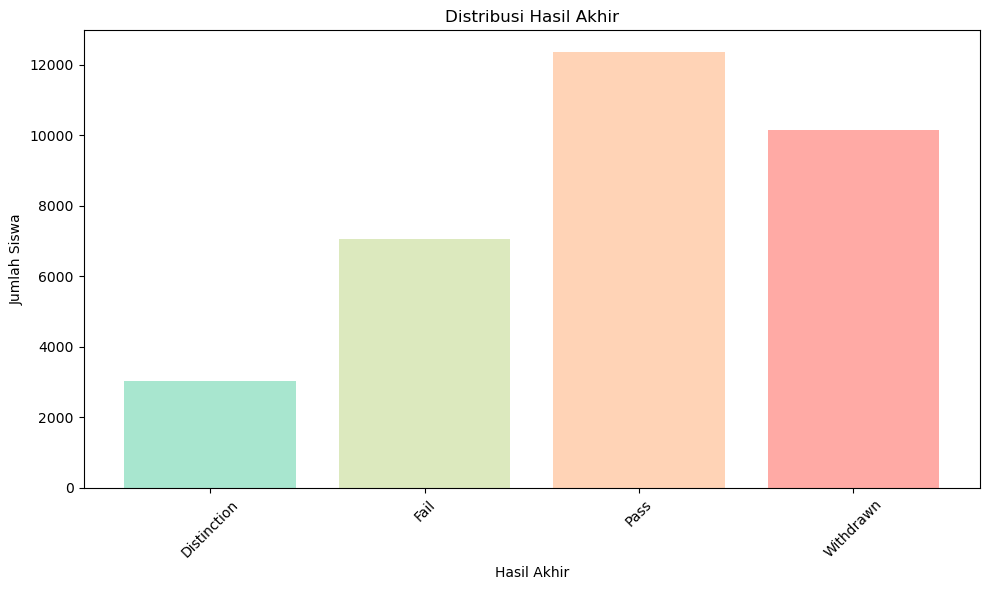

In [43]:
(unique, counts) = np.unique(df_studin["final_result"], return_counts=True)

plt.figure(figsize=(10,6))
plt.bar(unique, counts, color=['#A8E6CF', '#DCE9BE', '#FFD3B6', '#FFAAA5'])

plt.title("Distribusi Hasil Akhir")
plt.xlabel("Hasil Akhir")
plt.ylabel("Jumlah Siswa")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<h2>Relasi</h2>

**Tabel Student Assasment dan Assasment**

In [44]:
merged_data = pd.merge(df_studass, df_ass, on='id_assessment')

**Rata-rata Nilai berdasarkan Tipe Assessment**

Dari visualisasi ini, kita mendapat informasi mengenai rata-rata nilai siswa untuk assessment bertipe CMA paling tinggi, mendekati 80. Ini menunjukkan bahwa siswa umumnya memiliki kinerja yang sangat baik dalam assessment yang dinilai secara komputer.Rata-rata nilai untuk tipe assessment exam merupakan yang paling rendah adan di sekitar angka 60-an. Ini menunjukkan bahwa siswa rata-rata menemukan beberapa kesulitan atau tantangan ketika menghadapi assessment jenis exam.

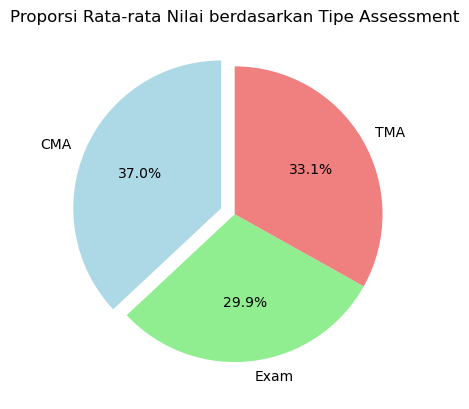

In [45]:
avg_scores = merged_data.groupby('assessment_type')['score'].mean()
avg_scores.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral'], explode=(0.1, 0, 0))
plt.title('Proporsi Rata-rata Nilai berdasarkan Tipe Assessment')
plt.ylabel('') 
plt.show()

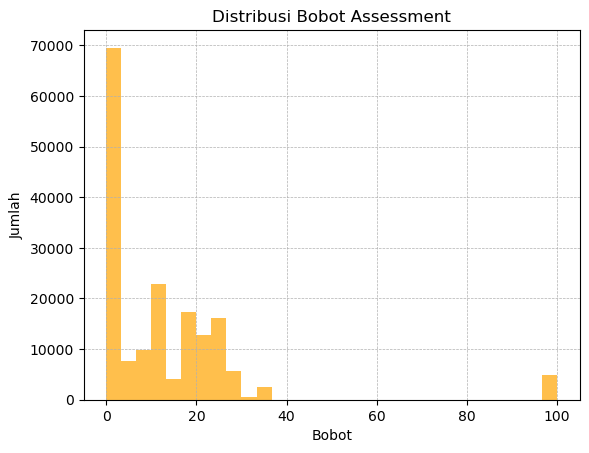

In [46]:
plt.hist(merged_data['weight'], bins=30, color='orange', alpha=0.7)
plt.title('Distribusi Bobot Assessment')
plt.xlabel('Bobot')
plt.ylabel('Jumlah')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

C:\Users\ichaa\AppData\Local\Temp\ipykernel_22112\2319149426.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='assessment_type', y='weight', data=merged_data, estimator=np.mean, ci=None, palette='viridis')


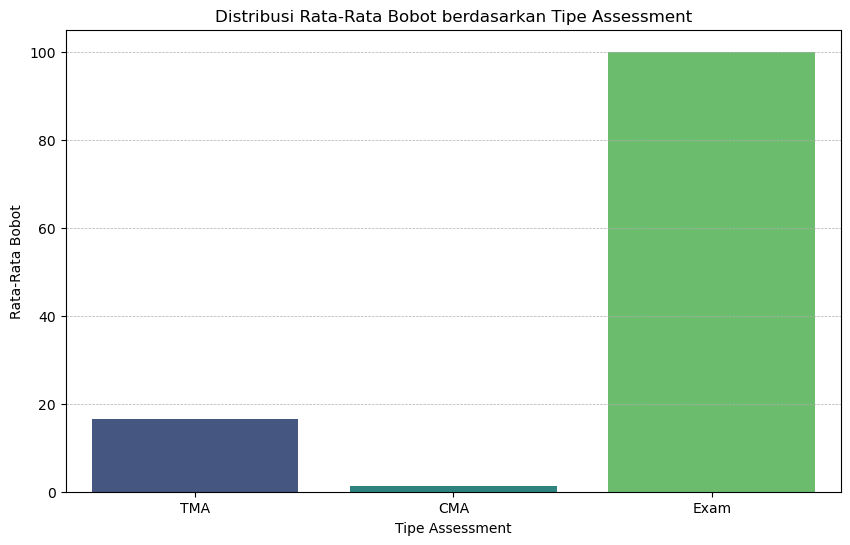

In [47]:
plt.figure(figsize=(10,6))
sns.barplot(x='assessment_type', y='weight', data=merged_data, estimator=np.mean, ci=None, palette='viridis')
plt.title('Distribusi Rata-Rata Bobot berdasarkan Tipe Assessment')
plt.xlabel('Tipe Assessment')
plt.ylabel('Rata-Rata Bobot')
plt.grid(True, axis='y', linestyle='--', linewidth=0.5)
plt.show()

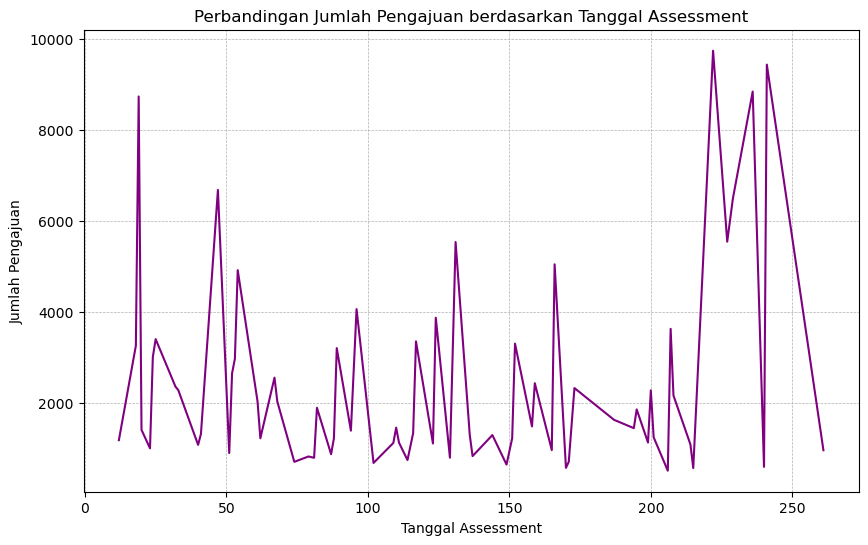

In [48]:
submission_counts = merged_data.groupby('date')['id_student'].count()
plt.figure(figsize=(10,6))
submission_counts.plot(kind='line', color='purple')
plt.title('Perbandingan Jumlah Pengajuan berdasarkan Tanggal Assessment')
plt.xlabel('Tanggal Assessment')
plt.ylabel('Jumlah Pengajuan')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

In [49]:
merged_data2 = pd.merge(df_studin, df_studreg, on='id_student')

In [50]:
plt.figure(figsize=(12, 6))
merged_data['region'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Distribusi Jumlah Siswa berdasarkan Wilayah')
plt.xlabel('Wilayah')
plt.ylabel('Jumlah Siswa')
plt.xticks(rotation=45)
plt.show()

KeyError: 'region'

<Figure size 1200x600 with 0 Axes>

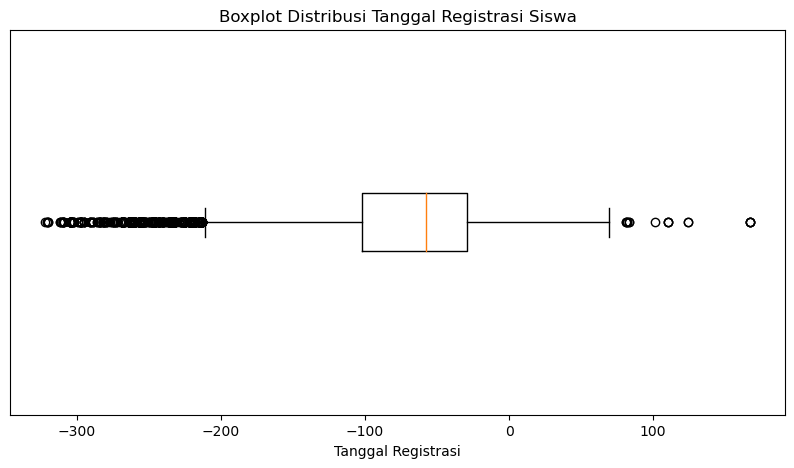

In [ ]:
plt.figure(figsize=(10, 5))
plt.boxplot(merged_data['date_registration'].dropna(), vert=False) 
plt.title('Boxplot Distribusi Tanggal Registrasi Siswa')
plt.xlabel('Tanggal Registrasi')
plt.yticks([])  
plt.show()

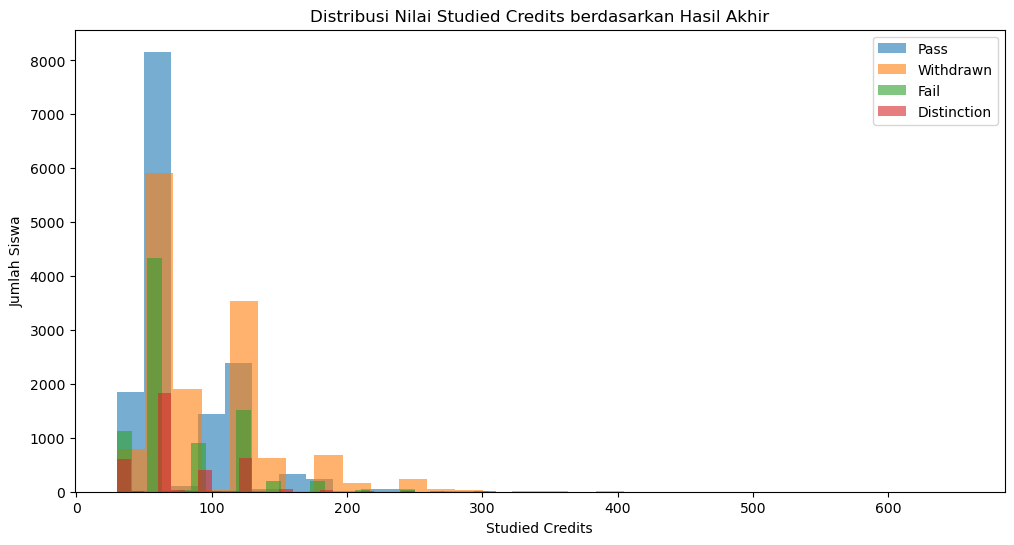

In [ ]:
plt.figure(figsize=(12, 6))
for result in merged_data['final_result'].unique():
    subset = merged_data[merged_data['final_result'] == result]
    plt.hist(subset['studied_credits'], alpha=0.6, label=result, bins=30)

plt.title('Distribusi Nilai Studied Credits berdasarkan Hasil Akhir')
plt.xlabel('Studied Credits')
plt.ylabel('Jumlah Siswa')
plt.legend(loc='upper right')
plt.show()